<a href="https://colab.research.google.com/github/RhiturajD/Consumer-Complaint-Classifier/blob/main/Complaint_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,cross_val_score

In [ ]:
df = pd.read_csv("Consumer_Complaints.csv")

In [ ]:
df.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer Complaint,Company Public Response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date Sent to Company,Company Response to Consumer,Timely response?,Consumer disputed?,Complaint ID
0,3/12/14,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,M&T BANK CORPORATION,MI,48382,NaN,NaN,Referral,3/17/14,Closed with explanation,Yes,No,759217
1,10/1/16,Credit reporting,NaN,Incorrect information on credit report,Account status,I have outdated information on my credit repor...,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",AL,352XX,NaN,Consent provided,Web,10/5/16,Closed with explanation,Yes,No,2141773
2,10/17/16,Consumer Loan,Vehicle loan,Managing the loan or lease,NaN,I purchased a new car on XXXX XXXX. The car de...,NaN,"CITIZENS FINANCIAL GROUP, INC.",PA,177XX,Older American,Consent provided,Web,10/20/16,Closed with explanation,Yes,No,2163100
3,6/8/14,Credit card,NaN,Bankruptcy,NaN,NaN,NaN,AMERICAN EXPRESS COMPANY,ID,83854,Older American,NaN,Web,6/10/14,Closed with explanation,Yes,Yes,885638
4,9/13/14,Debt collection,Credit card,Communication tactics,Frequent or repeated calls,NaN,NaN,"CITIBANK, N.A.",VA,23233,NaN,NaN,Web,9/13/14,Closed with explanation,Yes,Yes,1027760


In [ ]:
df.shape

(9999, 18)

In [ ]:
col = ['Product', 'Consumer Complaint']
df= df[col]

In [ ]:
df= df[pd.notnull(df['Consumer Complaint'])]

In [ ]:
df.columns=['Product', 'Consumer_complaint']

In [ ]:

df['category_id'] = df['Product'].factorize()[0]

In [ ]:
cat_id_df = df[["Product", "category_id"]].drop_duplicates().sort_values('category_id')

In [ ]:
cat_to_id = dict(cat_id_df.values)

In [ ]:
id_to_cat = dict(cat_id_df[['category_id','Product']].values)

In [ ]:
df.head()

,Product,Consumer_complaint,category_id
1,Credit reporting,I have outdated information on my credit repor...,0
2,Consumer Loan,I purchased a new car on XXXX XXXX. The car de...,1
7,Credit reporting,An account on my credit report has a mistaken ...,0
12,Debt collection,This company refuses to provide me verificatio...,2
16,Debt collection,This complaint is in regards to Square Two Fin...,2


In [ ]:
fig = plt.figure(figsize= (8,6))

<Figure size 800x600 with 0 Axes>

<Axes: xlabel='Product'>

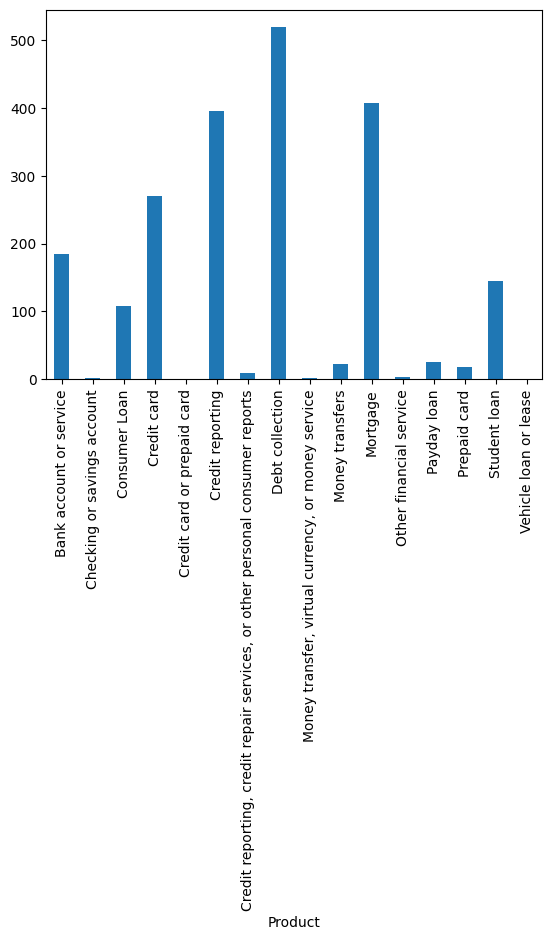

In [ ]:
df.groupby('Product').Consumer_complaint.count().plot.bar(ylim=0)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tfidf = TfidfVectorizer(sublinear_tf= True, #use a logarithmic form for frequency
                       min_df = 5, #minimum numbers of documents a word must be present in to be kept
                       norm= 'l2', #ensure all our feature vectors have a euclidian norm of 1
                       ngram_range= (1,2), #to indicate that we want to consider both unigrams and bigrams.
                       stop_words ='english') #to remove all common pronouns to reduce the number of noisy features

In [ ]:
features = tfidf.fit_transform(df.Consumer_complaint).toarray()

In [ ]:
labels = df.category_id
features.shape

(2114, 6081)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df['Consumer_complaint'], df['Product'], random_state= 0)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
count_vect = CountVectorizer()

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer

In [ ]:
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

In [ ]:
from sklearn.svm import LinearSVC
clf = LinearSVC().fit(X_train_tfidf, y_train)

In [ ]:
print(clf.predict(count_vect.transform(['I have outdated information on my credit repor'])))

['Credit reporting']


In [ ]:
y_pred = clf.predict(count_vect.transform(X_test))

In [ ]:
from sklearn import metrics

In [ ]:
print(metrics.classification_report(y_test,y_pred))

                                                                              precision    recall  f1-score   support

                                                     Bank account or service       0.60      0.80      0.69        44
                                                               Consumer Loan       0.36      0.43      0.39        21
                                                                 Credit card       0.69      0.78      0.73        72
                                                            Credit reporting       0.70      0.87      0.77        91
Credit reporting, credit repair services, or other personal consumer reports       0.00      0.00      0.00         2
                                                             Debt collection       0.86      0.69      0.76       124
                                                             Money transfers       0.20      0.09      0.13        11
                                                       

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.pipeline import Pipeline

In [ ]:
text_clf=Pipeline([('tf',TfidfVectorizer(sublinear_tf= True, 
                       min_df = 5, 
                       norm= 'l2', 
                       ngram_range= (1,2), 
                       stop_words ='english') ),
                 ('clf',LinearSVC())])

In [ ]:
text_clf.fit(X_train, y_train)



Pipeline(steps=[('tf',
                 TfidfVectorizer(min_df=5, ngram_range=(1, 2),
                                 stop_words='english', sublinear_tf=True)),
                ('clf', LinearSVC())])

In [ ]:
text_clf.predict(['I have outdated information on my credit repor'])[0]


'Credit reporting'

In [ ]:
cv_results = cross_val_score(text_clf, 
                                 X_train, y_train, 
                                 cv=5,
                                 scoring="accuracy",
                                 n_jobs=-1)
print(np.mean(cv_results))

/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


0.7936908517350157


In [ ]:
from sklearn.naive_bayes import BernoulliNB

In [ ]:
mb=BernoulliNB()

In [ ]:
text_clf=Pipeline([('tf',TfidfVectorizer(sublinear_tf= True, 
                       min_df = 5, 
                       norm= 'l2', 
                       ngram_range= (1,2), 
                       stop_words ='english') ),
                 ('clf',BernoulliNB())])

In [ ]:
text_clf.fit(X_train, y_train)

Pipeline(steps=[('tf',
                 TfidfVectorizer(min_df=5, ngram_range=(1, 2),
                                 stop_words='english', sublinear_tf=True)),
                ('clf', BernoulliNB())])

In [ ]:
text_clf.predict(['I have outdated information on my credit repor'])[0]

'Credit reporting'

In [ ]:
y_pred=text_clf.predict(X_test)

In [ ]:
print(metrics.classification_report(y_test,y_pred))

                                                                              precision    recall  f1-score   support

                                                     Bank account or service       0.71      0.55      0.62        44
                                                               Consumer Loan       0.50      0.14      0.22        21
                                                                 Credit card       0.69      0.60      0.64        72
                                                            Credit reporting       0.60      0.92      0.73        91
Credit reporting, credit repair services, or other personal consumer reports       0.00      0.00      0.00         2
                                                             Debt collection       0.63      0.84      0.72       124
                                                             Money transfers       0.00      0.00      0.00        11
                                                       

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
cv_results = cross_val_score(text_clf, 
                                 X_train, y_train, 
                                 cv=5,
                                 scoring="accuracy",
                                 n_jobs=-1)

/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


In [ ]:
print(np.mean(cv_results))

0.6580441640378549


In [ ]:
from lightgbm import LGBMClassifier

In [ ]:
text_clf=Pipeline([('tf',TfidfVectorizer(sublinear_tf= True, 
                       min_df = 5, 
                       norm= 'l2', 
                       ngram_range= (1,2), 
                       stop_words ='english') ),
                 ('clf',LGBMClassifier())])

In [ ]:
text_clf.fit(X_train, y_train)

Pipeline(steps=[('tf',
                 TfidfVectorizer(min_df=5, ngram_range=(1, 2),
                                 stop_words='english', sublinear_tf=True)),
                ('clf', LGBMClassifier())])

In [ ]:
y_pred=text_clf.predict(X_test)

In [ ]:
print(metrics.classification_report(y_test,y_pred))

                                                                              precision    recall  f1-score   support

                                                     Bank account or service       0.70      0.68      0.69        44
                                                               Consumer Loan       0.47      0.38      0.42        21
                                                                 Credit card       0.73      0.81      0.77        72
                                                            Credit reporting       0.81      0.84      0.82        91
Credit reporting, credit repair services, or other personal consumer reports       0.00      0.00      0.00         2
                                                             Debt collection       0.73      0.87      0.79       124
                                                             Money transfers       1.00      0.18      0.31        11
                                                       

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
cv_results = cross_val_score(text_clf, 
                                 X_train, y_train, 
                                 cv=5,
                                 scoring="accuracy",
                                 n_jobs=-1)

/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


In [ ]:
print(np.mean(cv_results))

0.7678233438485805


In [ ]:
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

In [ ]:
 #Randomized Search CV
 import numpy as np
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]

In [ ]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

In [ ]:
# Use the random grid to search for best hyperparameters
rf=RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='accuracy', n_iter = 10, cv = 5,n_jobs=-1)

In [ ]:
rf.fit(X_train_tfidf, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   scoring='accuracy')

In [ ]:
rf.best_params_

{'n_estimators': 1000,
 'min_samples_split': 15,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 25}

In [ ]:
rf.best_score_

0.7261829652996845

In [ ]:
rf.best_score_

0.7261829652996845

In [ ]:
from xgboost import XGBClassifier

In [ ]:
from scipy.stats import uniform, randint

In [ ]:
xgb=XGBClassifier()

In [ ]:
params = {
    "gamma": uniform(0, 0.5),
    "learning_rate": uniform(0.03, 0.3), # default 0.1 
    "max_depth": randint(2, 6), # default 3
    "n_estimators": randint(100, 150), # default 100
    "subsample": uniform(0.6, 0.4)
}

In [ ]:
xgb = RandomizedSearchCV(estimator = xgb, param_distributions = params,scoring='accuracy', n_iter = 10, cv = 5, n_jobs = -1)

In [ ]:
xgb.fit(X_train_tfidf, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


ValueError: ignored

In [ ]:
xgb.best_params_

AttributeError: ignored

In [ ]:
xgb.best_score_

In [ ]:
xgb.best_params_

In [ ]:
from sklearn.ensemble import StackingClassifier
estimators = [('rf', rf), ('mb', mb),('ab',XGBClassifier())]

clf = StackingClassifier(estimators=estimators)

In [ ]:
clf.fit(X_train_tfidf, y_train)

In [ ]:
cv_results = cross_val_score(clf, 
                                 X_train_tfidf, y_train, 
                                 cv=5,
                                 scoring="accuracy",
                                 n_jobs=-1)
print(np.mean(cv_results))